In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
'''
Check if the time betwene samples are constant
'''

'\nCheck if the time betwene samples are constant\n'

In [ ]:
path='/scratch/lnw8px/GAN/gestures-dataset/'
user_list=os.listdir(path)
data = {'user': [], 'repitition': [],'gesture':[],'ts':[],'x':[],'y':[],'z':[]}
for user in user_list:
    if(user[0]=='U'):
        gesture_list=os.listdir(path+user)
        for gesture in gesture_list:
            count=0
            repitition_list=os.listdir(path+user+'/'+gesture)
            for repitition in repitition_list:
                count+=1
                repitition_num=repitition[0:2]
                file=path+user+'/'+gesture+'/'+repitition
                f = open(file, "r")
                lines=f.readlines()
                x_list,y_list,z_list,ts_list=[],[],[],[]
                #read data into variables
                for line in lines:
                    splt=line.split(' ')
                    ts,x,y,z=int(splt[2]),float(splt[3]),float(splt[4]),float(splt[5][0:-1])
                    x_list.append(x)
                    y_list.append(y)
                    z_list.append(z)
                    ts_list.append(ts)
                data['user'].append(user)
                data['repitition'].append(int(repitition_num))
                data['gesture'].append(int(gesture))
                data['x'].append(x_list)
                data['y'].append(y_list)
                data['z'].append(z_list)
                data['ts'].append(ts_list)

diff_list=[]
for ts_list in data['ts']:
    diff=np.diff(np.array(ts_list))
    for item in list(diff):
        diff_list.append(item)
diff_list=np.array(diff_list)
print('average time difference between two samples='+str(np.mean(diff_list)))
plt.hist(diff_list)

In [ ]:
'''
109933886 should be in nano seconds. Therefore average sampling rate = 1/109933886*1e9
which is 9 Hz
'''

'''
most of the samples are taken at the same interval. i.e the sampling rate is constant most of the time.
There is no need to resample/interpolate
'''

In [45]:
path='/scratch/lnw8px/GAN/gestures-dataset/'
user_list=os.listdir(path)
data = {'user': [], 'repitition': [],'gesture':[],'x':[],'y':[],'z':[]}
for user in user_list:
    if(user[0]=='U'):
        gesture_list=os.listdir(path+user)
        for gesture in gesture_list:
            count=0
            repitition_list=os.listdir(path+user+'/'+gesture)
            for repitition in repitition_list:
                count+=1
                repitition_num=repitition[0:2]
                file=path+user+'/'+gesture+'/'+repitition
                f = open(file, "r")
                lines=f.readlines()
                x_list,y_list,z_list=[],[],[]
                #read data into variables
                for line in lines:
                    splt=line.split(' ')
                    ts,x,y,z=int(splt[2]),float(splt[3]),float(splt[4]),float(splt[5][0:-1])
                    x_list.append(x)
                    y_list.append(y)
                    z_list.append(z)
                data['user'].append(user)
                data['repitition'].append(int(repitition_num))
                data['gesture'].append(int(gesture))
                data['x'].append(x_list)
                data['y'].append(y_list)
                data['z'].append(z_list)
            #print(user+'/'+repitition)
            #print(count)
data=pd.DataFrame(data)

In [127]:
'''
plot x,y and z data for 10 repititions
of the user 'U01' and of gesture 10
'''

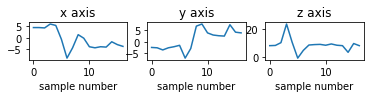

In [60]:
d=data[(data['user']=='U01') & (data['gesture']==10)]
for i in range(0,1):
    plt.subplot(5,3,1)
    plt.plot(d['x'].iloc[i])
    plt.title('x axis')
    plt.xlabel('sample number')
    
    plt.subplot(5,3,2)
    plt.plot(d['y'].iloc[i])
    plt.title('y axis')
    plt.xlabel('sample number')
    
    plt.subplot(5,3,3)
    plt.plot(d['z'].iloc[i])
    plt.title('z axis')
    plt.xlabel('sample number')
    
    plt.show()

In [139]:
data.head()

,user,repitition,gesture,x,y,z
0,U07,5,16,"[8.580819, 8.580819, 8.887277, 10.726024, 10.7...","[3.983952, 3.830723, 3.524265, 6.895301, 6.588...","[3.217807, 3.217807, 4.903325, 10.572795, 9.50..."
1,U07,2,16,"[9.193734, 9.040505, 9.040505, 10.572795, 12.2...","[1.37906, 1.225831, 1.225831, 3.830723, 1.0726...","[3.830723, 3.983952, 5.822699, 12.717999, 11.7..."
2,U07,13,16,"[8.274362, 8.121132, 9.040505, 11.032481, 11.3...","[4.443638, 4.29041, 5.209783, 7.967903, 7.5082...","[2.75812, 2.298434, 5.516241, 11.33894, 9.3469..."
3,U07,14,16,"[8.121132, 8.42759, 7.661446, 9.80665, 10.2663...","[4.443638, 4.137181, 5.66947, 7.967903, 7.9679...","[2.911349, 3.064578, 5.516241, 9.193734, 9.500..."
4,U07,3,16,"[9.040505, 9.346964, 8.121132, 11.33894, 13.02...","[0.306458, 0.153229, -1.991976, -0.612916, -1....","[4.137181, 4.443638, 6.588843, 12.871228, 12.4..."


In [ ]:
'''
Distribustion of lengths of the data segments. Here 10 is approx 1 second
'''

mean=19.707782220855123
sd=4.6709108221286515


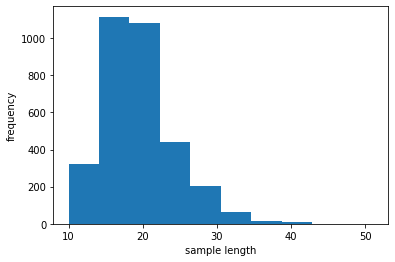

In [64]:
def get_len(array):
    return len(array)
lengths=data['x'].apply(get_len)
plt.hist(lengths)
plt.xlabel('sample length')
plt.ylabel('frequency')
print('mean='+str(np.mean(lengths)))
print('sd='+str(np.std(lengths)))

In [ ]:
'''
save the dataframe as pickle
'''

In [201]:
data.to_pickle('/scratch/lnw8px/GAN/data.pkl')

In [202]:
data.head()

,user,repitition,gesture,x,y,z,crop_x,crop_y,crop_z
0,U07,5,16,"[8.580819, 8.580819, 8.887277, 10.726024, 10.7...","[3.983952, 3.830723, 3.524265, 6.895301, 6.588...","[3.217807, 3.217807, 4.903325, 10.572795, 9.50...","[8.580819, 8.580819, 8.580819, 8.580819, 8.580...","[8.580819, 8.580819, 8.580819, 8.580819, 8.580...","[8.580819, 8.580819, 8.580819, 8.580819, 8.580..."
1,U07,2,16,"[9.193734, 9.040505, 9.040505, 10.572795, 12.2...","[1.37906, 1.225831, 1.225831, 3.830723, 1.0726...","[3.830723, 3.983952, 5.822699, 12.717999, 11.7...","[9.193734, 9.193734, 9.193734, 9.193734, 9.193...","[9.193734, 9.193734, 9.193734, 9.193734, 9.193...","[9.193734, 9.193734, 9.193734, 9.193734, 9.193..."
2,U07,13,16,"[8.274362, 8.121132, 9.040505, 11.032481, 11.3...","[4.443638, 4.29041, 5.209783, 7.967903, 7.5082...","[2.75812, 2.298434, 5.516241, 11.33894, 9.3469...","[8.274362, 8.274362, 8.274362, 8.274362, 8.274...","[8.274362, 8.274362, 8.274362, 8.274362, 8.274...","[8.274362, 8.274362, 8.274362, 8.274362, 8.274..."
3,U07,14,16,"[8.121132, 8.42759, 7.661446, 9.80665, 10.2663...","[4.443638, 4.137181, 5.66947, 7.967903, 7.9679...","[2.911349, 3.064578, 5.516241, 9.193734, 9.500...","[8.121132, 8.121132, 8.121132, 8.121132, 8.121...","[8.121132, 8.121132, 8.121132, 8.121132, 8.121...","[8.121132, 8.121132, 8.121132, 8.121132, 8.121..."
4,U07,3,16,"[9.040505, 9.346964, 8.121132, 11.33894, 13.02...","[0.306458, 0.153229, -1.991976, -0.612916, -1....","[4.137181, 4.443638, 6.588843, 12.871228, 12.4...","[9.040505, 9.040505, 9.040505, 9.040505, 9.040...","[9.040505, 9.040505, 9.040505, 9.040505, 9.040...","[9.040505, 9.040505, 9.040505, 9.040505, 9.040..."


In [ ]:
'''
analyze min and max values of acceleration data
'''

In [214]:
def get_max(array):
    return np.max(array)
def get_min(array):
    return np.min(array)
print(np.max(data['x'].apply(get_max).values),np.min(data['x'].apply(get_min).values))
print(np.max(data['y'].apply(get_max).values),np.min(data['y'].apply(get_min).values))
print(np.max(data['z'].apply(get_max).values),np.min(data['z'].apply(get_min).values))

33.250675 -39.992744
78.146744 -36.468479
78.146744 -64.969055
